In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sn

# Data Reading &  preprocessing

In [2]:
training=pd.read_csv("./training.csv",sep=';')
validation=pd.read_csv("./validation.csv",sep=';')
print(training,validation)
print(training.dtypes)

     variable1 variable2  variable3 variable4 variable5 variable6 variable7  \
0            a     17,92    5,4e-05         u         g         c         v   
1            b     16,92   3,35e-05         y         p         k         v   
2            b     31,25  0,0001125         u         g        ff        ff   
3            a     48,17  0,0001335         u         g         i         o   
4            b     32,33    0,00035         u         g         k         v   
...        ...       ...        ...       ...       ...       ...       ...   
3695         a     18,75    0,00075         u         g         q         v   
3696         a      23,5      9e-04         u         g         q         v   
3697         b     34,17   0,000917         u         g         c         v   
3698         b     27,83   0,000154         u         g         W         v   
3699         a     36,75  0,0005125         u         g         e         v   

     variable8 variable9 variable10  variable11 var

In [3]:
# fix format of float variables
for df in [training,validation]:
    for var in ["variable2", "variable3","variable8"]:
        df[var]=df[var].apply(func=lambda x: float(str(x).replace(',','.')))

# fix format of float variables
for df in [training,validation]:
    for var in ["variable2", "variable3","variable8"]:
        df[var]=df[var].apply(func=lambda x: float(str(x).replace(',','.')))

In [4]:
# handle NAN values
print(training.isna().sum())

# drop variable18 too much NaN
training.drop(["variable18"],axis =1,inplace=True)
validation.drop(["variable18"],axis =1,inplace=True)


# drop NaN rows
training.dropna(inplace=True)
validation.dropna(inplace=True)

variable1       39
variable2       39
variable3        0
variable4       64
variable5       64
variable6       66
variable7       66
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     100
variable15       0
variable17     100
variable18    2145
variable19       0
classLabel       0
dtype: int64


<AxesSubplot:>

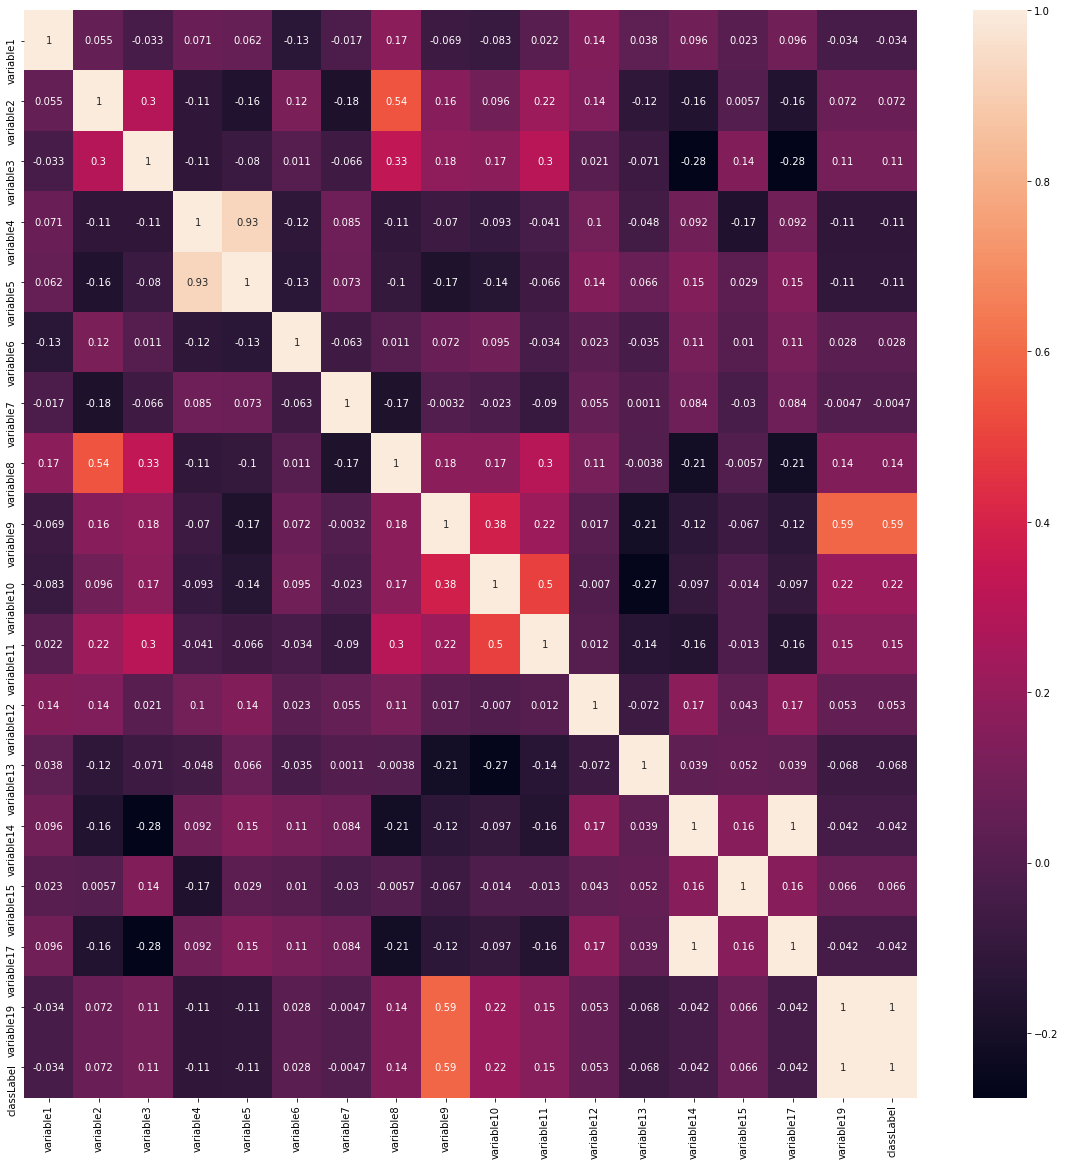

In [5]:
# map categorical colums to numerical values to see correlation between columns
corrm = training.apply(lambda x: x.astype("category").cat.codes if(x.dtype == np.object) else x).corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(corrm,annot=True, ax=ax)

<AxesSubplot:>

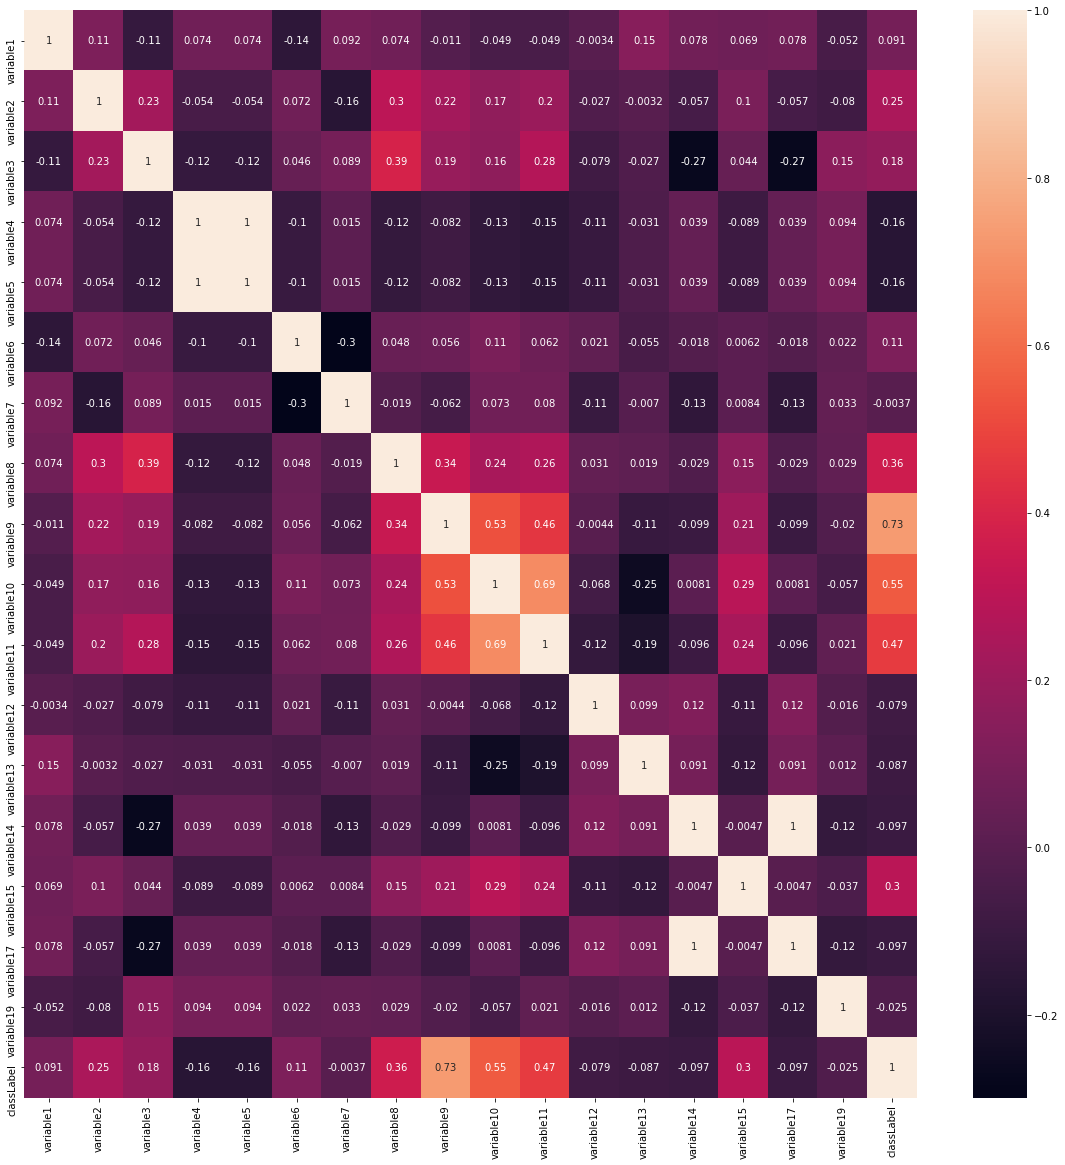

In [6]:
# also see on validation
# map categorical colums to numerical values to see correlation between columns
corrm = validation.apply(lambda x: x.astype("category").cat.codes if(x.dtype == np.object) else x).corr()
fig, ax = plt.subplots(figsize=(20,20)) 
sn.heatmap(corrm,annot=True, ax=ax)

In [7]:
# we can see that variable 17 is redundant in absense of 14 as it's only a scaled version of it
# aslo 4 and 5 
# variable 19 is highly correlated with class label on training but not the case on validation
# dropping this variable is crucial because of it make it easy for classier to overfit
# and give that variable much weight

redundant_cols = ["variable17","variable4","variable19"]
training.drop(columns=redundant_cols,inplace=True)
validation.drop(columns=redundant_cols,inplace=True)

In [8]:
training

,variable1,variable2,variable3,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,classLabel
0,a,17.92,0.000054,g,c,v,1.750,f,t,1,t,g,80.0,5,no.
1,b,16.92,0.000034,p,k,v,0.290,f,f,0,f,s,200.0,0,no.
2,b,31.25,0.000112,g,ff,ff,0.000,f,t,1,f,g,96.0,19,no.
3,a,48.17,0.000133,g,i,o,0.335,f,f,0,f,g,0.0,120,no.
4,b,32.33,0.000350,g,k,v,0.500,f,f,0,t,g,232.0,0,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3694,b,25.50,0.000037,g,m,v,0.250,t,t,3,f,g,260.0,15108,yes.
3696,a,23.50,0.000900,g,q,v,8.500,t,t,5,t,g,120.0,0,yes.
3697,b,34.17,0.000917,g,c,v,4.500,t,t,12,t,g,0.0,221,yes.
3698,b,27.83,0.000154,g,W,v,3.750,t,t,5,t,g,100.0,3,yes.


In [9]:
validation

,variable1,variable2,variable3,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,classLabel
0,b,32.33,0.000750,g,e,bb,1.585,t,f,0,t,s,420.0,0,no.
1,b,23.58,0.000179,g,c,v,0.540,f,f,0,t,g,136.0,1,no.
2,b,36.42,0.000075,p,d,v,0.585,f,f,0,f,g,240.0,3,no.
3,b,18.42,0.001042,p,aa,v,0.125,t,f,0,f,g,120.0,375,no.
4,b,24.50,0.001334,p,aa,v,0.040,f,f,0,t,g,120.0,475,no.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,b,23.08,0.001150,g,i,v,3.500,t,t,9,f,g,56.0,742,yes.
196,a,57.08,0.001950,g,c,v,5.500,t,t,7,f,g,0.0,3000,yes.
197,b,30.83,0.000000,g,W,v,1.250,t,t,1,f,g,202.0,0,yes.
198,b,19.67,0.000037,g,q,v,2.000,t,t,2,t,g,80.0,0,yes.


# Data Exploration

In [10]:
training.describe()

,variable2,variable3,variable8,variable11,variable14,variable15
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000
mean,32.879997,0.000595,3.505013,4.291880,162.457127,2217.746451
std,12.494864,0.000542,4.401864,6.876811,155.809054,8762.072131
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.920000,0.000150,0.585000,0.000000,0.000000,0.000000
50%,28.750000,0.000446,1.835000,2.000000,120.000000,134.000000
75%,41.000000,0.000996,5.000000,6.000000,280.000000,1065.000000
max,73.420000,0.002800,28.500000,67.000000,980.000000,100000.000000


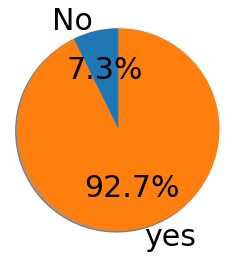

In [11]:
dataPie = training[['classLabel']]
bars_label=sorted(dataPie['classLabel'].value_counts().index.to_list())
size=dataPie['classLabel'].value_counts().sort_index(ascending=True).to_numpy()
labels=['No','yes']
fig, ax = plt.subplots(figsize=(4,4))
ax.pie(size, labels=labels,
        shadow=True, startangle=90, autopct='%1.1f%%',textprops={'fontsize': 30})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

we can see that data is not balanced so fn score will be much better indication of performance 
than accuracy

In [12]:
training.dtypes

variable1      object
variable2     float64
variable3     float64
variable5      object
variable6      object
variable7      object
variable8     float64
variable9      object
variable10     object
variable11      int64
variable12     object
variable13     object
variable14    float64
variable15      int64
classLabel     object
dtype: object

# Model building

## prepare data for classifier 

In [13]:
data_train = training.copy()
data_valid = validation.copy()

min_max_columns = [columnName for (columnName, column) in training.iteritems() if column.dtype != np.object]
y_column=['classLabel']

one_hot_columns = [columnName for (columnName, column) in training.iteritems() if columnName != 'classLabel' 
                   and column.dtype == np.object]
print(one_hot_columns)
# data normalization
data_train[min_max_columns] = MinMaxScaler().fit_transform(data_train[min_max_columns])
data_valid[min_max_columns] = MinMaxScaler().fit_transform(data_valid[min_max_columns])

# encode categorical variables
all_data = pd.concat([data_train,data_valid],axis=0) 
one_hot_all = pd.get_dummies(all_data[one_hot_columns])
one_hot_train, one_hot_valid = one_hot_all[:len(data_train)], one_hot_all[len(data_train):]
                                                                  
                                                                  
data_train = pd.concat([data_train,one_hot_train],axis=1)
data_train = data_train.drop(one_hot_columns,axis=1)

data_valid = pd.concat([data_valid,one_hot_valid],axis=1)
data_valid = data_valid.drop(one_hot_columns,axis=1)

# encode y_column
data_train[y_column]=(data_train[y_column]=="yes.").astype(int)
data_valid[y_column]=(data_valid[y_column]=="yes.").astype(int)

data_valid

['variable1', 'variable5', 'variable6', 'variable7', 'variable9', 'variable10', 'variable12', 'variable13']


,variable2,variable3,variable8,variable11,variable14,variable15,classLabel,variable1_a,variable1_b,variable5_g,...,variable7_z,variable9_f,variable9_t,variable10_f,variable10_t,variable12_f,variable12_t,variable13_g,variable13_p,variable13_s
0,0.269768,0.298983,0.07925,0.00,0.210,0.0000,0,0,1,1,...,0,0,1,1,0,0,1,0,0,1
1,0.125925,0.071357,0.02700,0.00,0.068,0.0001,0,0,1,1,...,0,1,0,1,0,0,1,1,0,0
2,0.337005,0.029898,0.02925,0.00,0.120,0.0003,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
3,0.041098,0.415188,0.00625,0.00,0.060,0.0375,0,0,1,0,...,0,0,1,1,0,1,0,1,0,0
4,0.141049,0.531593,0.00200,0.00,0.060,0.0475,0,0,1,0,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.117705,0.458441,0.17500,0.45,0.028,0.0742,1,0,1,1,...,0,0,1,0,1,1,0,1,0,0
196,0.676640,0.777357,0.27500,0.35,0.000,0.3000,1,1,0,1,...,0,0,1,0,1,1,0,1,0,0
197,0.245109,0.000000,0.06250,0.05,0.101,0.0000,1,0,1,1,...,0,0,1,0,1,1,0,1,0,0
198,0.061647,0.014949,0.10000,0.10,0.040,0.0000,1,0,1,1,...,0,0,1,0,1,0,1,1,0,0


In [14]:
# start with simple logisic regression
y_train = data_train[y_column] 
x_train = data_train.drop(y_column,axis=1)

y_valid = data_valid[y_column] 
x_valid = data_valid.drop(y_column,axis=1)

# train
clf = LogisticRegression()
clf.fit(x_train,y_train.values.ravel())

# training evalutation
print("On training ")
y_pre = clf.predict(x_train)
confusion_matrix(y_train, y_pre)
print(confusion_matrix(y_train, y_pre))
print("Acc : ",accuracy_score(y_train,y_pre))
print("f1 Score: ", f1_score(y_train,y_pre))

# validation evaluation
print("\nOn validation ")
y_pre = clf.predict(x_valid)
confusion_matrix(y_valid, y_pre)
print(confusion_matrix(y_valid, y_pre))
print("Acc : ",accuracy_score(y_valid,y_pre))
print("f1 Score: ", f1_score(y_valid,y_pre))

On training 
[[ 156  102]
 [  16 3248]]
Acc :  0.966496308915389
f1 Score:  0.9821590565467191

On validation 
[[47 52]
 [ 3 89]]
Acc :  0.7120418848167539
f1 Score:  0.7639484978540773


In [15]:
# try more sophisticated model NN
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(128,64),activation='tanh', random_state=42,verbose=True,)
clf.fit(x_train, y_train.values.ravel())

# training evalutation
print("On training ")
y_pre = clf.predict(x_train)
confusion_matrix(y_train, y_pre)
print(confusion_matrix(y_train, y_pre))
print("Acc : ",accuracy_score(y_train,y_pre))
print("f1 Score: ", f1_score(y_train,y_pre))

# validation evaluation
print("\nOn validation ")
y_pre = clf.predict(x_valid)
confusion_matrix(y_valid, y_pre)
print(confusion_matrix(y_valid, y_pre))
print("Acc : ",accuracy_score(y_valid,y_pre))
print("f1 Score: ", f1_score(y_valid,y_pre))


On training 
[[ 258    0]
 [   0 3264]]
Acc :  1.0
f1 Score:  1.0

On validation 
[[76 23]
 [ 6 86]]
Acc :  0.8481675392670157
f1 Score:  0.855721393034826


On training 
[[ 258    0]
 [   0 3264]]
Acc :  1.0
f1 Score:  1.0

On validation 
[[76 23]
 [ 6 86]]
Acc :  0.8481675392670157
f1 Score:  0.855721393034826


<BarContainer object of 43 artists>

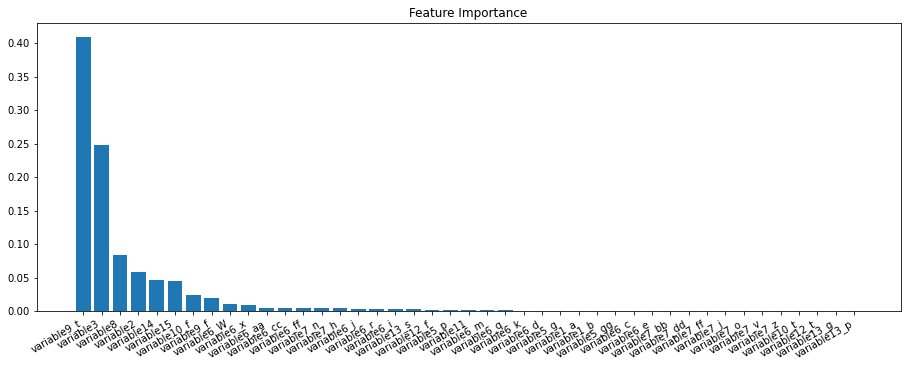

In [16]:
# boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=20,learning_rate=.5)
gbclf = gb.fit(x_train, y_train.values.ravel())

# training evalutation
print("On training ")
y_pre = clf.predict(x_train)
confusion_matrix(y_train, y_pre)
print(confusion_matrix(y_train, y_pre))
print("Acc : ",accuracy_score(y_train,y_pre))
print("f1 Score: ", f1_score(y_train,y_pre))

# validation evaluation
print("\nOn validation ")
y_pre = clf.predict(x_valid)
confusion_matrix(y_valid, y_pre)
print(confusion_matrix(y_valid, y_pre))
print("Acc : ",accuracy_score(y_valid,y_pre))
print("f1 Score: ", f1_score(y_valid,y_pre))

fig= plt.figure(figsize=(15,5))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
axes.set_title('Feature Importance')
feature_importances = sorted(zip(x_train.columns, gb.feature_importances_),key=lambda x:x[1],reverse=True)
fig.autofmt_xdate()
plt.bar(*zip(*feature_importances))

It's obvouis that there is nolinear relation betwenn the class lable and some input variables so NN and boosting performed better that logistic regression

Also i wanted to check that the importance of variables becuase i have had some doubts about categorical variables importance